<h1><center> Linear regression </center></h1>
<h2><center> GL </center></h2> 
<h3><center> ASMAE KARMOUCHI </center></h3>
<h3><center> MOHAMMED AMINE KENDI</center></h3>
<h5><center> Academic Year: 2022 - 2023</center></h5>

In [130]:
import numpy as np
import matplotlib.pyplot as plt

In [131]:
# Générer les données avec un bruit gaussien
np.random.seed(42)
x = np.linspace(0, 10, 20)  # Générer 20 valeurs espacées de manière linéaire entre 0 et 10
y = 2 * x + np.random.normal(scale=1, size=20)  # Ajouter un peu de bruit gaussien à une relation linéaire

In [132]:
# Calculate the variance of a list of numbers

def variance(a ,a_mean):

  return np.sum((a - a_mean) ** 2)

In [133]:
# Calculate covariance between x and y

def covariance(a, a_mean, b, b_mean):
    return np.sum((a - a_mean) * (b - b_mean))

In [152]:
# Calculate coefficients
def coefficients(a, a_mean, b, b_mean):
    beta_1 = covariance(a, a_mean, b, b_mean) / variance(a ,a_mean)
    beta_0 = b_mean - beta_1 * a_mean
    return beta_0 , beta_1


In [ ]:
def MSE(a,a_pred,m):
    return np.sum((a - a_pred) ** 2) / m

In [134]:
# Implémentation de la régression linéaire
def linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calcul des coefficients de la droite de régression
    beta_0 , beta_1 = coefficients(x, x_mean, y, y_mean)

    # Calcul de la prédiction
    y_pred = beta_0 + beta_1 * x

    # Calcul de la fonction de perte (MSE)
    loss = MSE(y,y_pred,n)

    return beta_0, beta_1, y_pred, loss

In [135]:
# Obtenir les coefficients et la prédiction
intercept, slope, y_pred, loss = linear_regression(x, y)

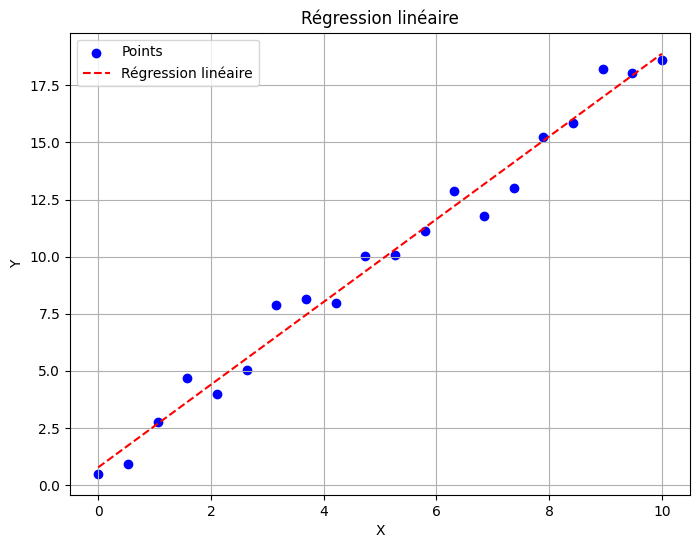

Coefficient de pente (slope) : 1.8108269609929553
Coefficient d'interception (intercept) : 0.774566633593393


In [136]:
# Visualisation des points et de la droite de régression
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Points')
plt.plot(x, slope * x + intercept, color='red', linestyle='--', label='Régression linéaire')
plt.title('Régression linéaire')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print("Coefficient de pente (slope) :", slope)
print("Coefficient d'interception (intercept) :", intercept)

Coefficient de pente (slope) : 1.8108269609929553
Coefficient d'interception (intercept) : 0.774566633593393
Perte (loss) : 0.545959906195692


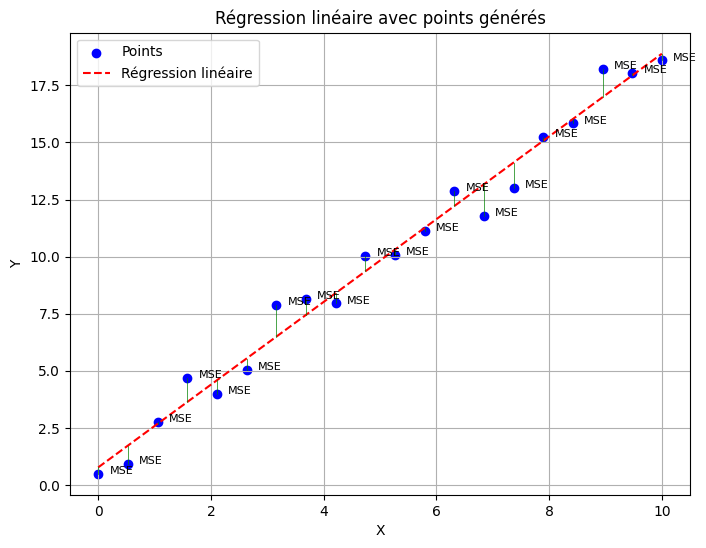

In [137]:

# Calcul du MSE pour chaque point
mse_per_point = np.mean((y - y_pred)**2)

# Affichage des résultats
print("Coefficient de pente (slope) :", slope)
print("Coefficient d'interception (intercept) :", intercept)
print("Perte (loss) :", mse_per_point)

# Visualisation des points et de la droite de régression
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Points')
plt.plot(x, y_pred, color='red', linestyle='--', label='Régression linéaire')

# Tracer les lignes reliant chaque point aux valeurs prédites
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], color='green', linewidth=0.5)

    # Afficher le MSE pour chaque point près de la ligne
    plt.text(x[i] + 0.2, y[i], f"MSE", fontsize=8)

plt.title('Régression linéaire avec points générés')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


## Simple Linear Regression
In this example we will consider sales based on 'TV' marketing budget.

In this notebook, we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.

In [138]:
import pandas as pd


In [139]:
# Reading csv file from github repo
advertising = pd.read_csv('tvmarketing.csv')

In [140]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [141]:
# Display the first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [142]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


<Axes: xlabel='TV', ylabel='Sales'>

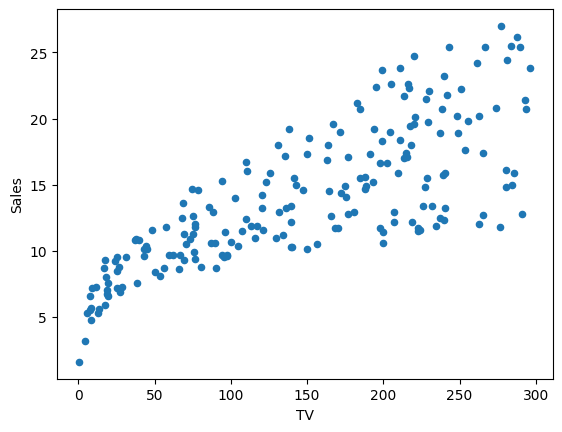

In [143]:
# Visualise the relationship between the features and the response using scatterplots
advertising.plot(x='TV',y='Sales',kind='scatter')

In [144]:
correlation = advertising['TV'].corr(advertising['Sales'])
print("Coefficient de corrélation entre le budget de publicité TV et les ventes :", correlation)


Coefficient de corrélation entre le budget de publicité TV et les ventes : 0.7822244248616066


## Perfroming Simple Linear Regression¶
### Equation of linear regression
y=c+m1x1+m2x2+...+mnxn
 
y
  is the response
c
  is the intercept
m1
  is the coefficient for the first feature
mn
  is the coefficient for the nth feature
In our case:

#### y=c+m1×TV
 
The  m
  values are called the model coefficients or model parameters.

### Preparing X and y
X (feature variable) and y (response variable)

In [145]:
# Putting feature variable to X
X1 = advertising['TV']

# Print the first 5 rows
X1.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [146]:
# Putting response variable to y
y1 = advertising['Sales']

# Print the first 5 rows
y1.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size=0.7 , random_state=0000)

In [148]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [149]:
# Obtenir les coefficients et la prédiction
intercept, slope, y_pred, loss = linear_regression(X_train, y_train)

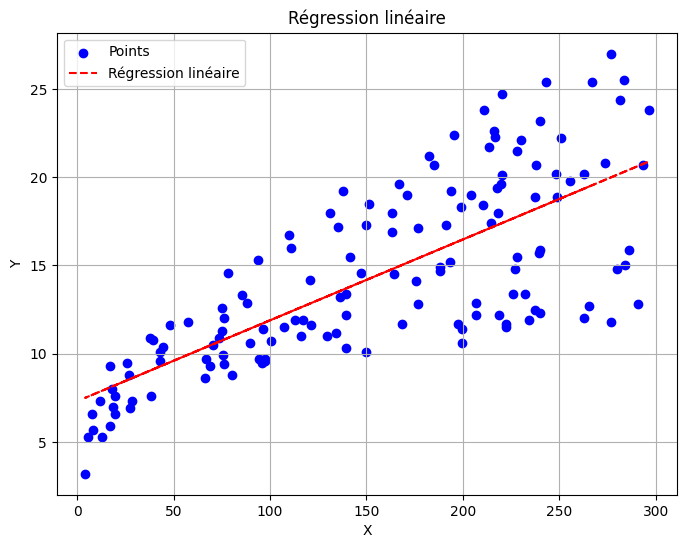

Coefficient de pente (slope) : 0.04581434217189622
Coefficient d'interception (intercept) : 7.310810165411682


In [150]:
# Visualisation des points et de la droite de régression
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Points')
plt.plot(X_train, slope * X_train + intercept, color='red', linestyle='--', label='Régression linéaire')
plt.title('Régression linéaire')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print("Coefficient de pente (slope) :", slope)
print("Coefficient d'interception (intercept) :", intercept)

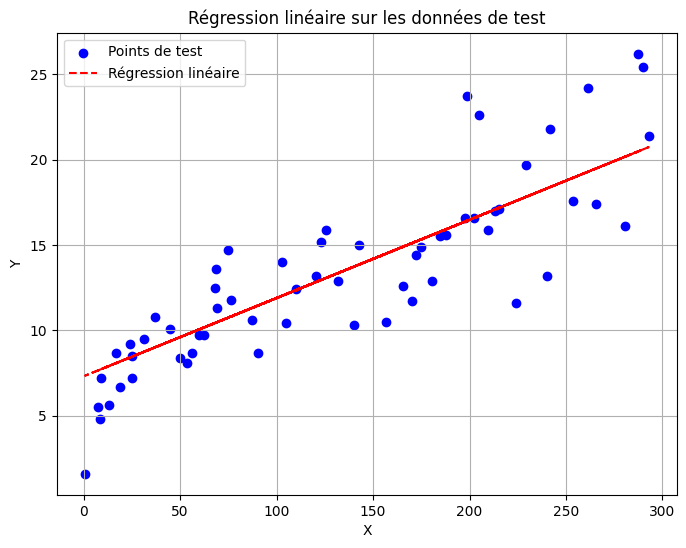

Perte (loss) sur les données de test : 7.497479593464674


In [151]:
# Utiliser les mêmes coefficients pour prédire sur les données de test
y_pred_test = slope * X_test + intercept

# Calculer la fonction de perte (MSE) sur les données de test
loss_test = np.mean((y_test - y_pred_test)**2)

# Visualiser les points de test et la droite de régression
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Points de test')
plt.plot(X_test, y_pred_test, color='red', linestyle='--', label='Régression linéaire')
plt.title('Régression linéaire sur les données de test')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print("Perte (loss) sur les données de test :", loss_test)
